In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

C:\Users\ajitk\AppData\Local\Temp\ipykernel_4416\2603832728.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
start = '2012-01-01'
end = '2023-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\ajitk\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3013,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
3014,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
3015,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
3016,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [5]:
ma_100_days = data.Close.rolling(100).mean()

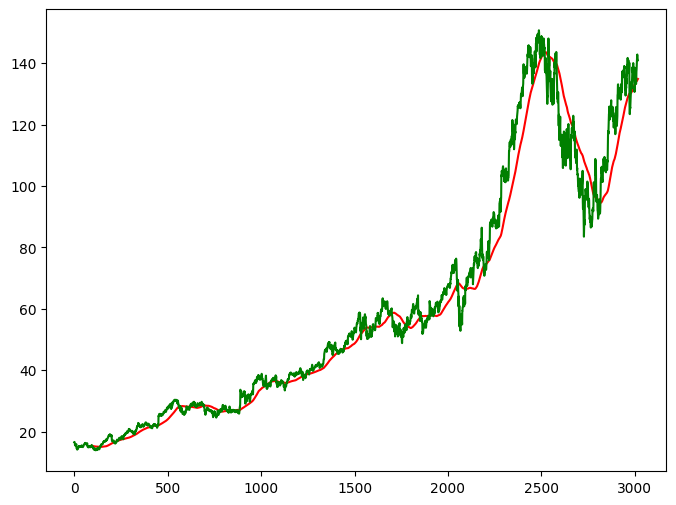

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

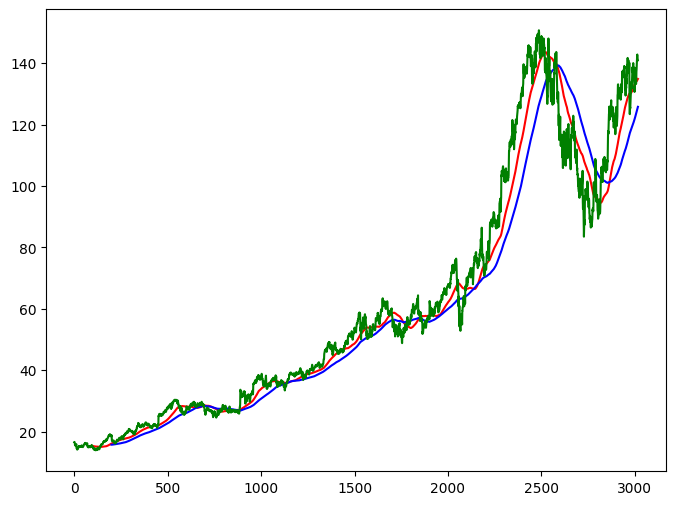

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2414

In [12]:
data_test.shape[0]

604

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\ajitk\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - loss: 0.0306
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0064
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0030
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0034
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0030
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0028
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0028
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0032
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - loss: 0.0023
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0026
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0023
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0026
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0024
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0022
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - lo

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [30]:
pas_100_days = data_train.tail(100)

In [31]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [32]:
data_test_scale  =  scaler.fit_transform(data_test)

In [33]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [34]:
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


In [35]:
scale =1/scaler.scale_

In [36]:
y_predict = y_predict*scale

In [37]:
y = y*scale

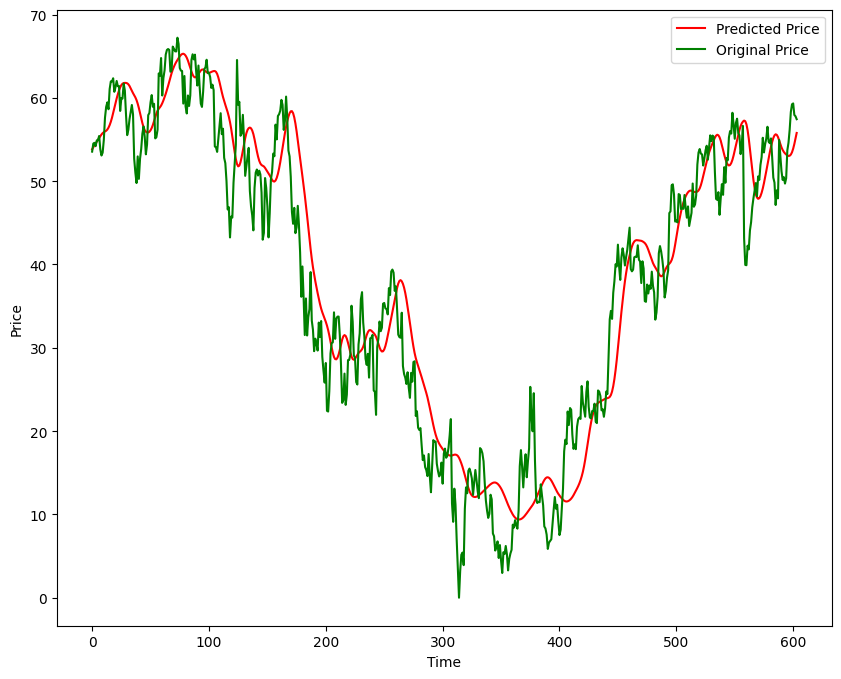

In [38]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
model.save('Stock Predictions Model.keras')